In [21]:
install("sqldf")
library(tidyverse)
library(sqldf)


ERROR: Error in install("sqldf"): could not find function "install"


# Joining datasets
Before you join datasets, you need to know why you are joining them.  Does the outcome give you more information, or is it misleading?  Are they sets suitable for joining?  Are rows left out because of different spelling of a key attribute?  What conclusions can we draw from the result?

Take the Kaggle example of three datasets regarding diversity, tuition cost and salary potential.  It seems like they're very compatible.  The 'diversity' set gives us the total number of students enrolled in each college and the total of each that belongs to categories that are diverse.

In [2]:
#diversity in colleges dataset
dv <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/diversity_school.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  name = col_character(),
  total_enrollment = col_double(),
  state = col_character(),
  category = col_character(),
  enrollment = col_double()
)




In [3]:
head(dv)

name,total_enrollment,state,category,enrollment
<chr>,<dbl>,<chr>,<chr>,<dbl>
University of Phoenix-Arizona,195059,Arizona,Women,134722
University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876
University of Phoenix-Arizona,195059,Arizona,Asian,1959
University of Phoenix-Arizona,195059,Arizona,Black,31455
University of Phoenix-Arizona,195059,Arizona,Hispanic,13984
University of Phoenix-Arizona,195059,Arizona,Native Hawaiian / Pacific Islander,1019


#### So let's look at the categories.  Take the University of Phoenix-Arizona.  Are the categories mutually exclusive?

In [4]:
UofPA<-sqldf('Select * from dv where name = "University of Phoenix-Arizona"')
UofPA

ERROR: Error in sqldf("Select * from dv where name = \"University of Phoenix-Arizona\""): could not find function "sqldf"


In [5]:
sqldf("select sum(enrollment) from UofPA")

ERROR: Error in sqldf("select sum(enrollment) from UofPA"): could not find function "sqldf"


#### So if the total enrolment is 195059, the categories are not mutually exclusive, which is not surprising, given that one of the categories is 'Women' and another category is 'Total Minority'!  Let's take them out:

In [6]:
sqldf("select sum(enrollment) from UofPA") - sqldf("select enrollment from UofPA where category = 'Women'") -  sqldf("select enrollment from UofPA where category = 'Total Minority'")

ERROR: Error in sqldf("select sum(enrollment) from UofPA"): could not find function "sqldf"


So let's adjust our dataset accordingly:

In [7]:
dv <- sqldf("select * from dv where category not in ('Women','Total Minority')")

ERROR: Error in sqldf("select * from dv where category not in ('Women','Total Minority')"): could not find function "sqldf"


#### Let's look at what the primary key might be.  How many rows are there in the dataset?  If the college and category are the primary key, are there the same number of unique values for those as there are rows in the dataset?

In [8]:
nrow(dv)
sqldf("select count(*) from (select distinct name, state, category from dv )")

[1] 50655

ERROR: Error in sqldf("select count(*) from (select distinct name, state, category from dv )"): could not find function "sqldf"


In [9]:
sqldf("select name, state, category from dv group by name, state, category having count(*)>1")

ERROR: Error in sqldf("select name, state, category from dv group by name, state, category having count(*)>1"): could not find function "sqldf"


In [10]:
dv <-drop_na(dv)
nrow(dv)
sqldf("select count(*) from (select distinct name, state, category from dv )")

[1] 50314

ERROR: Error in sqldf("select count(*) from (select distinct name, state, category from dv )"): could not find function "sqldf"


#### So now we have one row for each college, we can look at proportions.

In [11]:
dvsum=sqldf("select category, sum(enrollment) enrolled from dv group by category
order by enrolled desc")

ERROR: Error in sqldf("select category, sum(enrollment) enrolled from dv group by category\norder by enrolled desc"): could not find function "sqldf"


In [12]:
dvsum

ERROR: Error in eval(expr, envir, enclos): object 'dvsum' not found


In [13]:
ggplot(data=dvsum, aes(x="",y=enrolled, fill=category))+geom_bar(stat="identity") +
coord_polar(theta="y")

ERROR: Error in ggplot(data = dvsum, aes(x = "", y = enrolled, fill = category)): object 'dvsum' not found


How many unique colleges do we have?

In [14]:
sqldf("select count(*) from (select distinct name, state from dv)")

ERROR: Error in sqldf("select count(*) from (select distinct name, state from dv)"): could not find function "sqldf"


### Moving on - let's look at tuition costs across the country

In [15]:
#Average cost of tuition in each college dataset
tc <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')
str(tc)


── Column specification ────────────────────────────────────────────────────────
cols(
  name = col_character(),
  state = col_character(),
  state_code = col_character(),
  type = col_character(),
  degree_length = col_character(),
  room_and_board = col_double(),
  in_state_tuition = col_double(),
  in_state_total = col_double(),
  out_of_state_tuition = col_double(),
  out_of_state_total = col_double()
)




spec_tbl_df [2,973 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ name                : chr [1:2973] "Aaniiih Nakoda College" "Abilene Christian University" "Abraham Baldwin Agricultural College" "Academy College" ...
 $ state               : chr [1:2973] "Montana" "Texas" "Georgia" "Minnesota" ...
 $ state_code          : chr [1:2973] "MT" "TX" "GA" "MN" ...
 $ type                : chr [1:2973] "Public" "Private" "Public" "For Profit" ...
 $ degree_length       : chr [1:2973] "2 Year" "4 Year" "2 Year" "2 Year" ...
 $ room_and_board      : num [1:2973] NA 10350 8474 NA 16648 ...
 $ in_state_tuition    : num [1:2973] 2380 34850 4128 17661 27810 ...
 $ in_state_total      : num [1:2973] 2380 45200 12602 17661 44458 ...
 $ out_of_state_tuition: num [1:2973] 2380 34850 12550 17661 27810 ...
 $ out_of_state_total  : num [1:2973] 2380 45200 21024 17661 44458 ...
 - attr(*, "spec")=
  .. cols(
  ..   name = col_character(),
  ..   state = col_character(),
  ..   state_code = col_character

Is there a row per college?


In [16]:
nrow(tc)
sqldf("select count(*) from (select distinct name, state from dv )")

[1] 2973

ERROR: Error in sqldf("select count(*) from (select distinct name, state from dv )"): could not find function "sqldf"


#### Okay - a row per college, but much fewer colleges than in the dv dataset.  If we merge these datasets, we cannot assume the same spread as we had in our pie chart.  We need to decide if we're happy to go ahead with that.


In [17]:
sqldf("select count(*) from tc where in_state_tuition is null")

ERROR: Error in sqldf("select count(*) from tc where in_state_tuition is null"): could not find function "sqldf"


In [18]:
dvltc= sqldf("select * from dv left join tc using(state, name)")
nrow(dvltc)
justdv = sqldf("select distinct state, name from dvltc where in_state_tuition is null")
nrow(justdv)
sqldf("select * from justdv where state = 'Arizona'")

ERROR: Error in sqldf("select * from dv left join tc using(state, name)"): could not find function "sqldf"


In [19]:
dvrtc= sqldf("select * from tc left join dv using(state, name)")
nrow(dvrtc)
justtc = sqldf("select distinct state, name from dvrtc where category is null")
nrow(justtc)
sqldf("select * from justtc where state = 'Arizona'")

ERROR: Error in sqldf("select * from tc left join dv using(state, name)"): could not find function "sqldf"


#### All of these are in both tc and dv, but have different spelling (e.g. GateWay and Gateway).

In [20]:
dvtc= sqldf("select * from dv join tc using(state, name)")
nrow(dvtc)

ERROR: Error in sqldf("select * from dv join tc using(state, name)"): could not find function "sqldf"


This means that while there is an overlap, there are colleges tc that aren't in dv and colleges in dv that aren't in tc.


Assuming we're going with the colleges that are in both, we need to redo our sum.

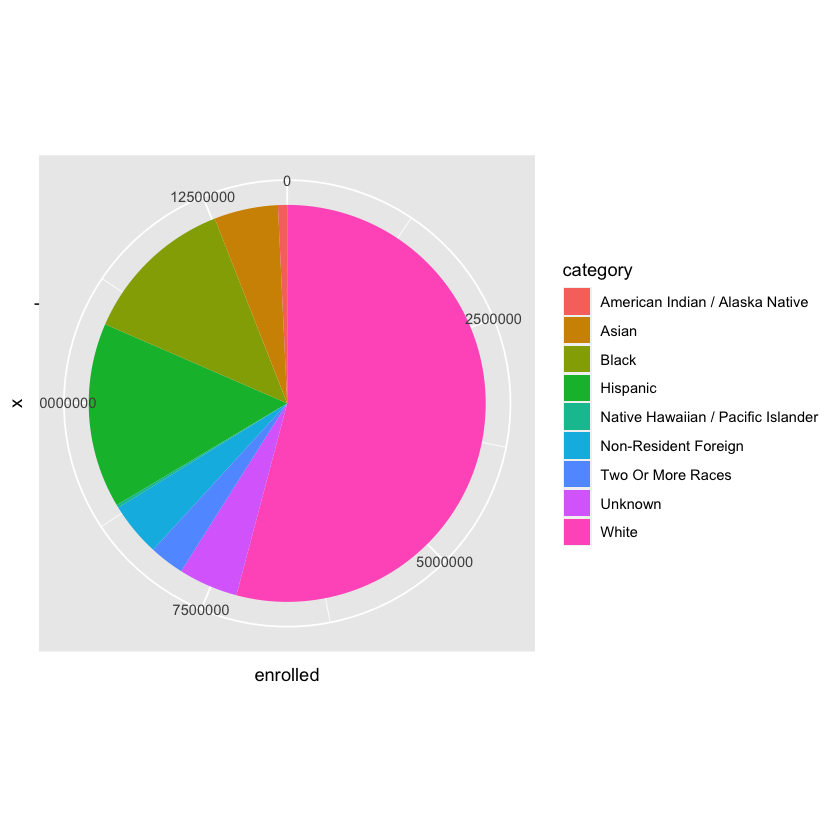

In [21]:
dvsum=sqldf("select category, sum(enrollment) enrolled from dvtc group by category
order by enrolled desc")
ggplot(data=dvsum, aes(x="",y=enrolled, fill=category))+geom_bar(stat="identity") +
coord_polar(theta="y")

So what information do we have now?  Let's look at a summary of the new dataset.

In [22]:
summary(dvtc)

     name           total_enrollment    state             category        
 Length:19386       Min.   :   15    Length:19386       Length:19386      
 Class :character   1st Qu.: 1351    Class :character   Class :character  
 Mode  :character   Median : 3132    Mode  :character   Mode  :character  
                    Mean   : 6185                                         
                    3rd Qu.: 7625                                         
                    Max.   :81459                                         
                                                                          
   enrollment       state_code            type           degree_length     
 Min.   :    0.0   Length:19386       Length:19386       Length:19386      
 1st Qu.:   11.0   Class :character   Class :character   Class :character  
 Median :   69.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  687.2                                                           
 3rd Qu.:  386.0    

In [23]:
sqldf("select distinct degree_length from dvtc")

degree_length
<chr>
4 Year
2 Year


In [24]:
sqldf("select sum(enrollment),degree_length, category from dvtc group by degree_length, category")

sum(enrollment),degree_length,category
<dbl>,<chr>,<chr>
55972,2 Year,American Indian / Alaska Native
303362,2 Year,Asian
756997,2 Year,Black
1258289,2 Year,Hispanic
16051,2 Year,Native Hawaiian / Pacific Islander
79174,2 Year,Non-Resident Foreign
161812,2 Year,Two Or More Races
237197,2 Year,Unknown
2828018,2 Year,White


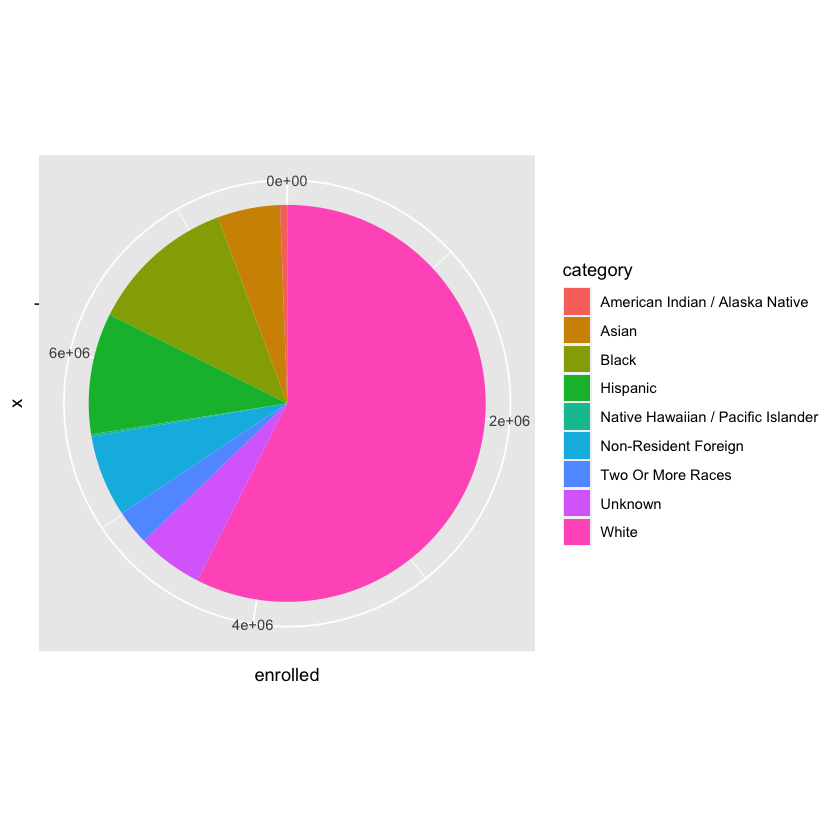

In [25]:
y4sum=sqldf("select category, sum(enrollment) enrolled from dvtc where degree_length = '4 Year' group by category
order by enrolled desc")
ggplot(data=y4sum, aes(x="",y=enrolled, fill=category))+geom_bar(stat="identity") +
coord_polar(theta="y")

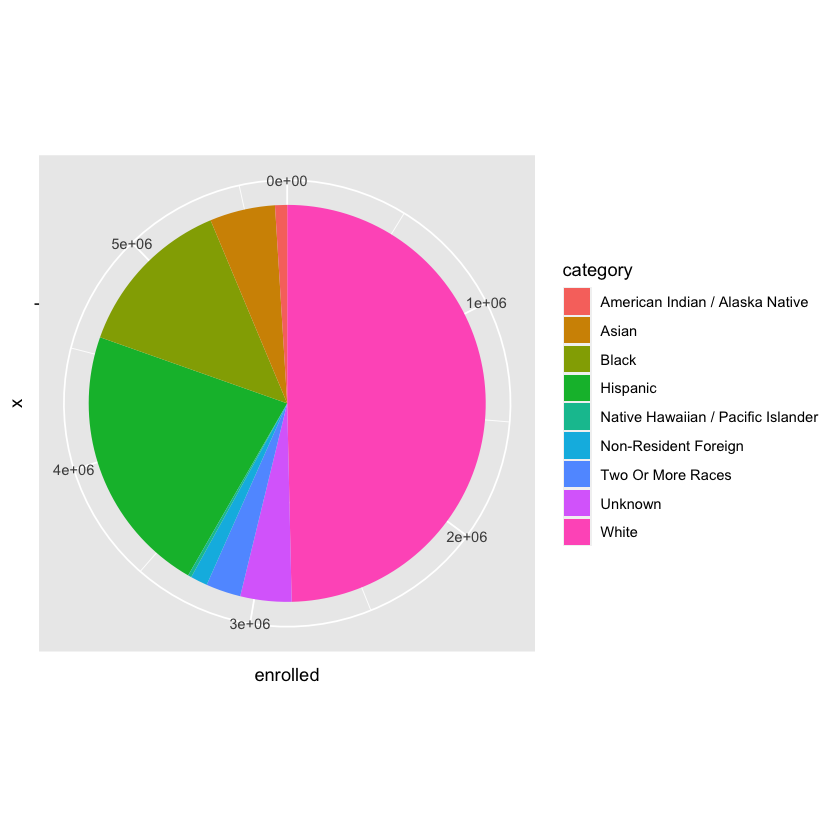

In [26]:
y2sum=sqldf("select category, sum(enrollment) enrolled from dvtc where degree_length = '2 Year' group by category
order by enrolled desc")
ggplot(data=y2sum, aes(x="",y=enrolled, fill=category))+geom_bar(stat="identity") +
coord_polar(theta="y")

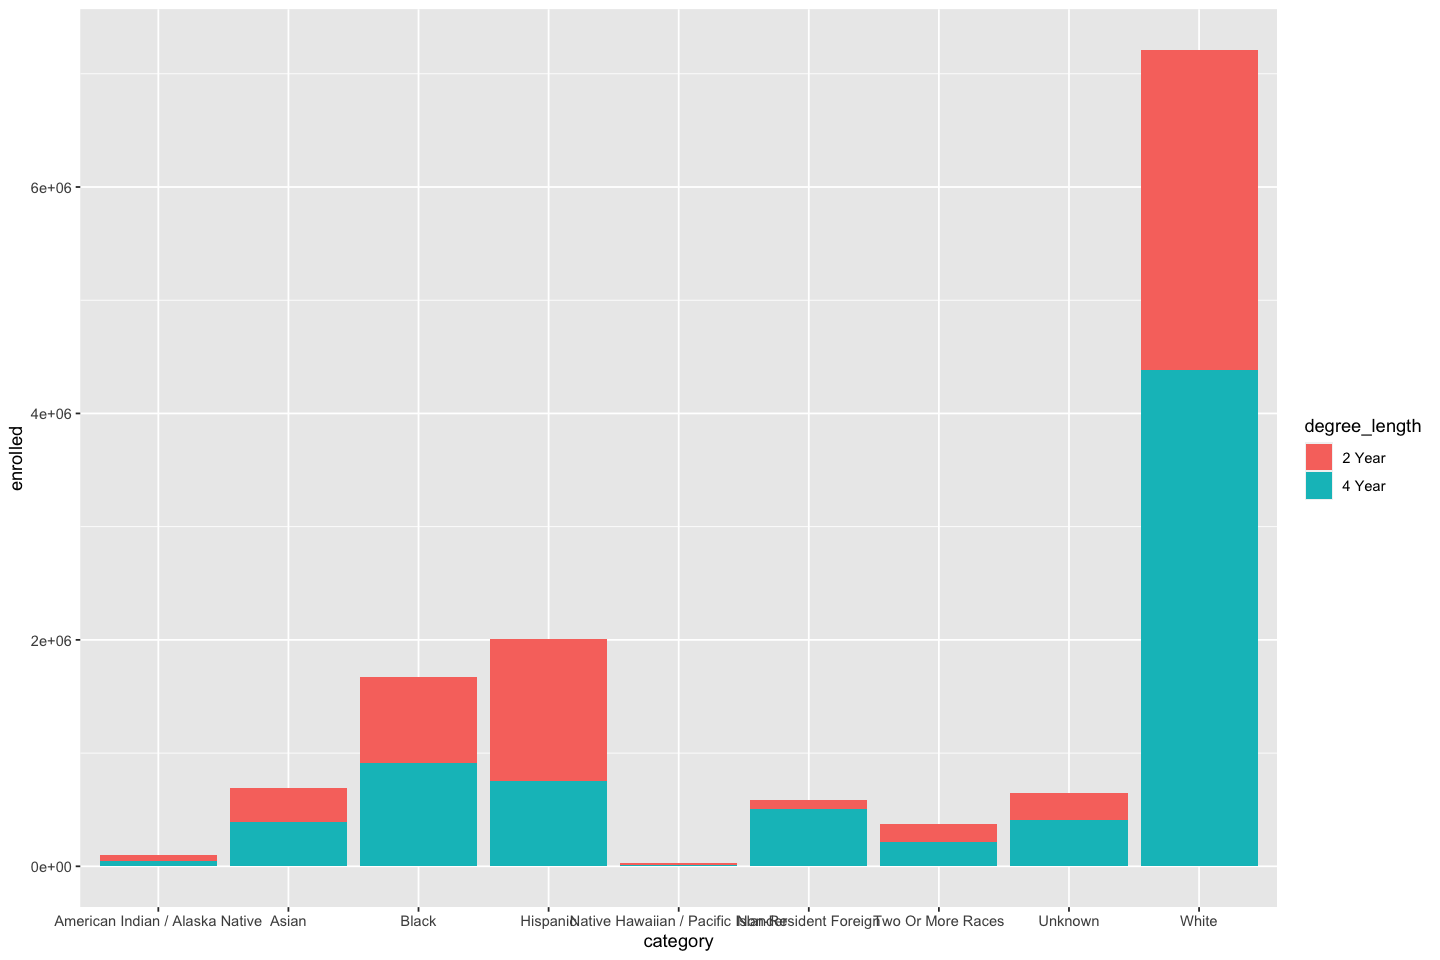

In [28]:
options(repr.plot.width=12, repr.plot.height=8)
yrsum=sqldf("select category, degree_length, sum(enrollment) enrolled from dvtc group by degree_length, category
order by enrolled desc")
ggplot(data=yrsum, aes(x=category, y=enrolled,  fill=degree_length))+
geom_bar(stat="identity") 

## Our final dataset - potential salary

In [29]:
#Potential salary of graduates from each college
sal <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv')

Parsed with column specification:
cols(
  rank = col_double(),
  name = col_character(),
  state_name = col_character(),
  early_career_pay = col_double(),
  mid_career_pay = col_double(),
  make_world_better_percent = col_double(),
  stem_percent = col_double()
)



In [30]:
#link to dataset: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-03-10/readme.md

#get row count

nrow(sal)
sal<-na.omit(sal)
nrow(sal)
summary(sal)
#get first 5
#head(dv, 5)

[1] 935

[1] 902

      rank           name            state_name        early_career_pay
 Min.   : 1.00   Length:902         Length:902         Min.   :32500   
 1st Qu.: 5.00   Class :character   Class :character   1st Qu.:46100   
 Median :11.00   Mode  :character   Mode  :character   Median :50100   
 Mean   :11.33                                         Mean   :51541   
 3rd Qu.:17.00                                         3rd Qu.:55700   
 Max.   :25.00                                         Max.   :91200   
 mid_career_pay   make_world_better_percent  stem_percent  
 Min.   : 61900   Min.   :33.00             Min.   : 0.00  
 1st Qu.: 81900   1st Qu.:48.00             1st Qu.: 7.00  
 Median : 90100   Median :52.00             Median :14.00  
 Mean   : 93150   Mean   :53.88             Mean   :17.28  
 3rd Qu.:100875   3rd Qu.:58.00             3rd Qu.:23.00  
 Max.   :158200   Max.   :94.00             Max.   :97.00  

### Again, let's find out what the primary key is and see what overlap there is with our amalgamated dvtc dataset

In [31]:
sqldf("select count(*) from (select distinct name, state_name from sal)")
nrow(sal)

count(*)
<int>
901


[1] 902

#### Check before elminating duplicate rows

In [32]:
sqldf("select name, state_name from sal group by name, state_name having count(*)>1")

name,state_name
<chr>,<chr>
Fairleigh Dickinson University-Florham Campus,New-Jersey


In [33]:

sqldf("select * from sal where name = 'Fairleigh Dickinson University-Florham Campus' ")

rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
9,Fairleigh Dickinson University-Florham Campus,New-Jersey,53700,98500,42,6
9,Fairleigh Dickinson University-Florham Campus,New-Jersey,53700,98500,42,6


#### It's a straightforward duplicate, so we can eliminate it

In [34]:
sal <- sqldf("select  distinct * from sal")
nrow(sal)

[1] 901

#### Now let's rename state, so the column names are the same in both

In [35]:
sal<-sal %>% 
  rename(
    state = state_name
    )

#### So name, state, category uniquely identify a row in dvtc

In [36]:
colnames(dvtc)
colnames(sal)

[1] "name"                 "total_enrollment"     "state"               
 [4] "category"             "enrollment"           "state_code"          
 [7] "type"                 "degree_length"        "room_and_board"      
[10] "in_state_tuition"     "in_state_total"       "out_of_state_tuition"
[13] "out_of_state_total"

[1] "rank"                      "name"                     
[3] "state"                     "early_career_pay"         
[5] "mid_career_pay"            "make_world_better_percent"
[7] "stem_percent"

In [37]:
sqldf("select distinct make_world_better_percent from sal")

make_world_better_percent
<dbl>
51
59
50
61
52
53
48
57
56


In [38]:
summary(sal)

      rank           name              state           early_career_pay
 Min.   : 1.00   Length:901         Length:901         Min.   :32500   
 1st Qu.: 5.00   Class :character   Class :character   1st Qu.:46100   
 Median :11.00   Mode  :character   Mode  :character   Median :50100   
 Mean   :11.34                                         Mean   :51538   
 3rd Qu.:17.00                                         3rd Qu.:55700   
 Max.   :25.00                                         Max.   :91200   
 mid_career_pay   make_world_better_percent  stem_percent  
 Min.   : 61900   Min.   :33.00             Min.   : 0.00  
 1st Qu.: 81900   1st Qu.:48.00             1st Qu.: 7.00  
 Median : 90100   Median :52.00             Median :14.00  
 Mean   : 93144   Mean   :53.89             Mean   :17.29  
 3rd Qu.:100900   3rd Qu.:58.00             3rd Qu.:23.00  
 Max.   :158200   Max.   :94.00             Max.   :97.00  

In [47]:
topdoers=sqldf("select  name, state, make_world_better_percent from sal 
where make_world_better_percent > 70
order by make_world_better_percent desc")

In [113]:
stem = sqldf("select  name, state, stem_percent from sal where stem_percent between 50 and 70")

In [114]:
newdf = sqldf("select * from dvtc join stem using (state, name)")

In [115]:
nrow(newdf)

[1] 72

In [116]:
head(newdf)

,name,total_enrollment,state,category,enrollment,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,stem_percent
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Stanford University,16963,California,American Indian / Alaska Native,98,CA,Private,4 Year,15763,51354,67117,51354,67117,51
2,Stanford University,16963,California,Asian,2630,CA,Private,4 Year,15763,51354,67117,51354,67117,51
3,Stanford University,16963,California,Black,633,CA,Private,4 Year,15763,51354,67117,51354,67117,51
4,Stanford University,16963,California,Hispanic,1749,CA,Private,4 Year,15763,51354,67117,51354,67117,51
5,Stanford University,16963,California,Native Hawaiian / Pacific Islander,30,CA,Private,4 Year,15763,51354,67117,51354,67117,51
6,Stanford University,16963,California,White,6218,CA,Private,4 Year,15763,51354,67117,51354,67117,51


In [100]:
unique(newdf$stem_percent)

[1] 51 66 69 64 52 60 61

In [154]:
salsum=sqldf("select category, sum(enrollment) enrolled from newdf group by category
order by enrolled desc")

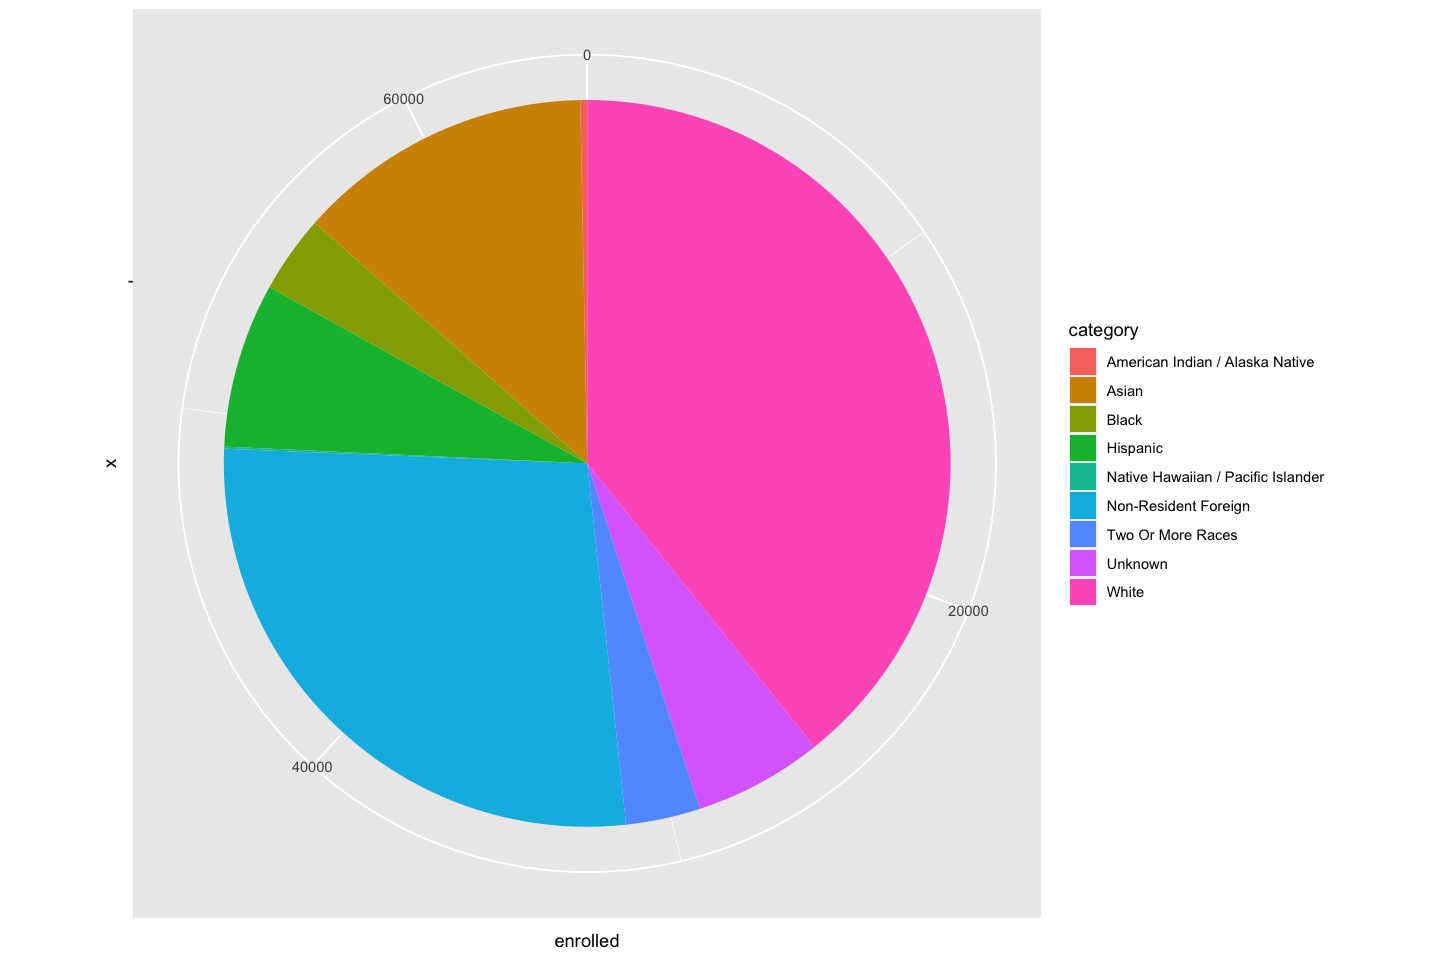

In [155]:
p = ggplot(data=salsum, aes(x="",y=enrolled, fill=category))+geom_bar(stat="identity") +
coord_polar(theta="y")
p

In [156]:
salsum

category,enrolled
<chr>,<dbl>
White,25430
Non-Resident Foreign,17722
Asian,8540
Hispanic,4744
Unknown,3718
Black,2239
Two Or More Races,2144
American Indian / Alaska Native,198
Native Hawaiian / Pacific Islander,61


In [157]:
tot = as.numeric(sqldf("select sum(enrolled) from salsum"))
tot
#sqldf("select cast (1 as real)/2")

[1] 64796

In [174]:
salsum$pct <- round(salsum$enrolled/tot,2)*100
salsum

category,enrolled,pct
<chr>,<dbl>,<dbl>
White,25430,39
Non-Resident Foreign,17722,27
Asian,8540,13
Hispanic,4744,7
Unknown,3718,6
Black,2239,3
Two Or More Races,2144,3


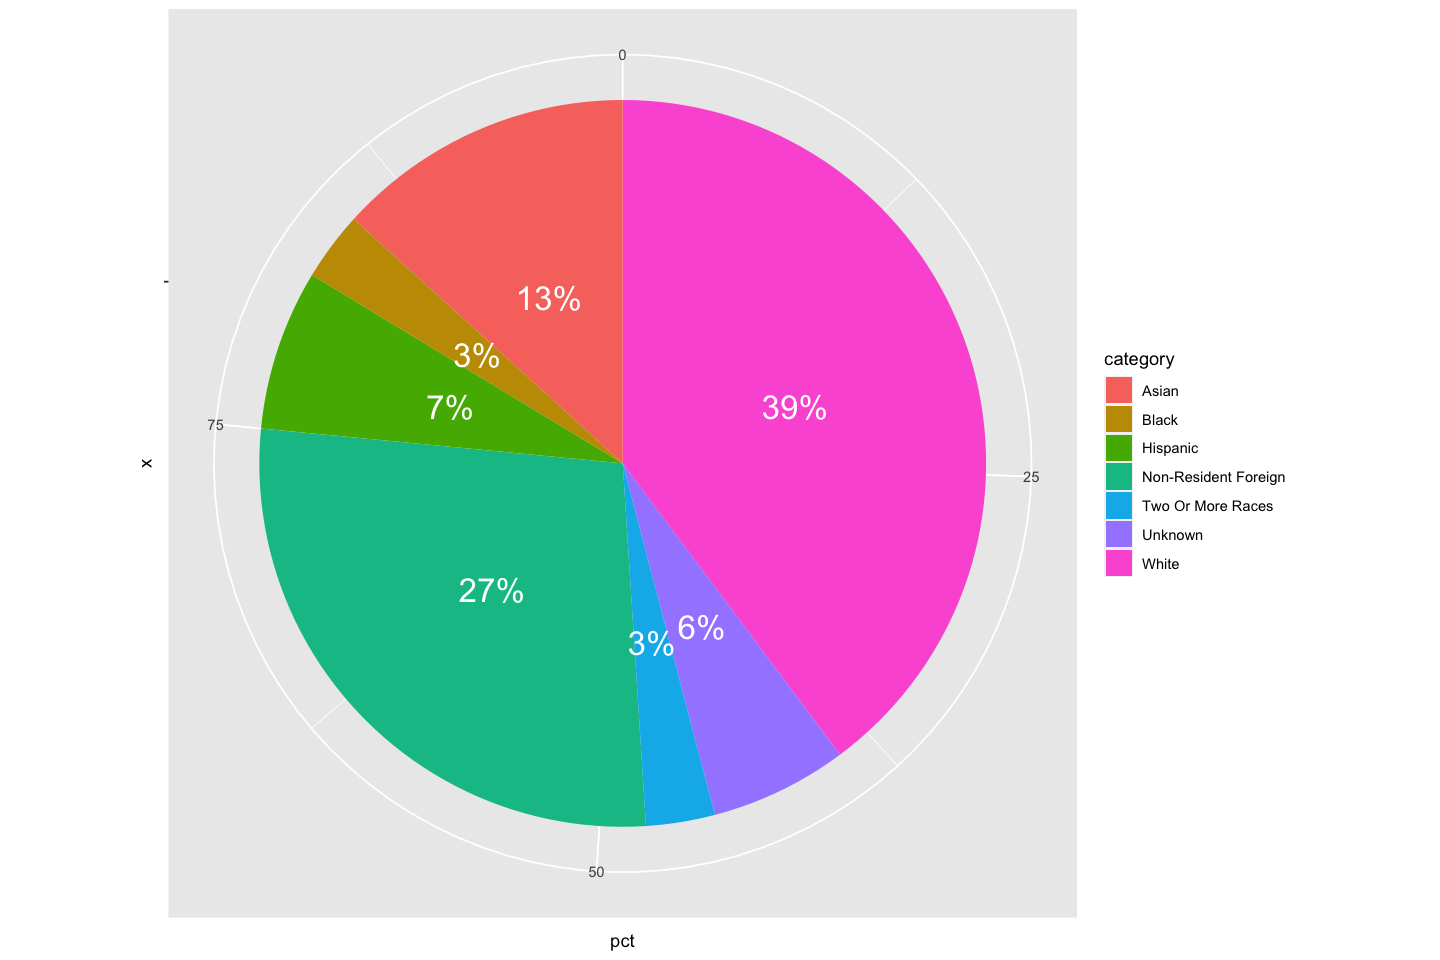

In [189]:
p = ggplot(data=salsum, aes(x="",y=pct, fill=category))+geom_bar(stat="identity") +
coord_polar(theta="y") +
 geom_text(aes(label = paste0(pct,"%")), color = "white", size=7, 
              position = position_stack(vjust = 0.5))
p